11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8869 - loss: 0.3983 - val_accuracy: 0.9724 - val_loss: 0.0926
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9763 - loss: 0.0810 - val_accuracy: 0.9791 - val_loss: 0.0658
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9828 - loss: 0.0592 - val_accuracy: 0.9790 - val_loss: 0.0680
Generating Explanations...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(5, 28, 28, 1))']

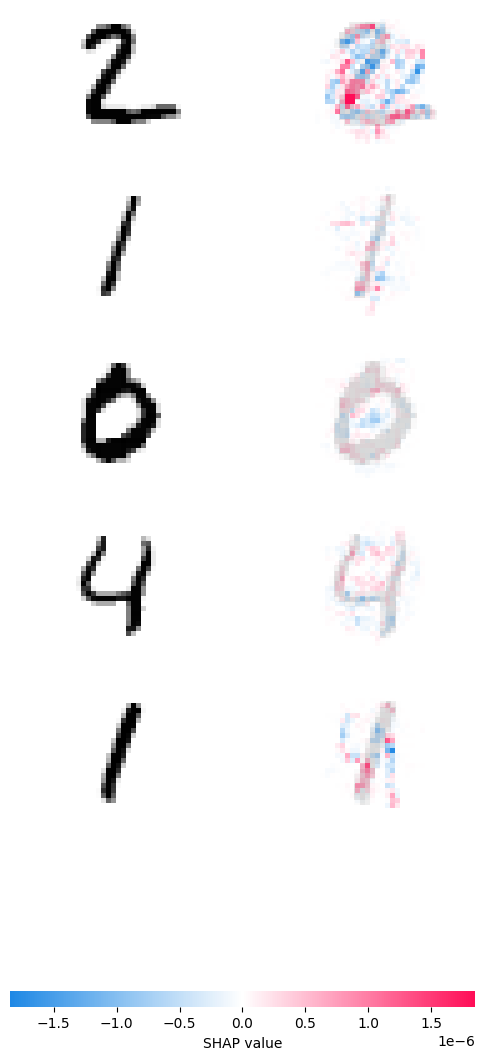

In [1]:
import tensorflow as tf
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data (MNIST - Handwritten digits)
# Simplest dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize
x_train = x_train[..., np.newaxis] # Add channel dimension
x_test = x_test[..., np.newaxis]

# 2. Build a Simple Model (CNN)
# Much smaller/faster than ViT
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Train (Fits in < 1 minute)
print("Training Model...")
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# 4. Explain with SHAP (DeepExplainer)
# This highlights which pixels caused the prediction
print("Generating Explanations...")
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:6]) # Explain first 5 images

# 5. Plot and Save Results
shap.image_plot(shap_values, -x_test[1:6])
plt.show()